In [2]:
## importing libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Multiple Topics

## Basic model (completely uncorrelated)

Idea: just run model twice, with no interaction between opinions (uninteresting - here for comparison with next model)

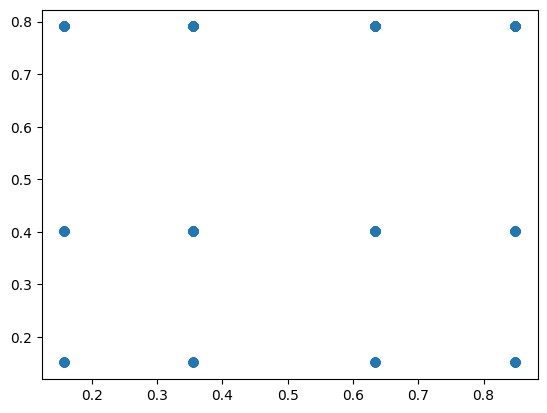

In [3]:
# Initialise parameters:
num_of_agents = 1000 # number of agents
Timesteps = 10 # timesteps
R = 0.1 # confidence bound

opinions1 = np.random.rand(num_of_agents)
opinions2 = np.random.rand(num_of_agents)

## Defining average opinion function
def get_A(opinions,R):
    '''
    A function to return the average opinion within R of each opinion in a vector of opinions
    '''
    
    num_of_agents = len(opinions)

    # Create a square matrix consisting of the opinions vector repeated num_of_agents times
    opinions_repeated = np.array([opinions]*len(opinions))
    # Create matrix of boolean values indicating which opinions are within R of each opinion
    mask = abs(opinions_repeated - opinions_repeated.T) < R
    
    # Initialise averages matrix
    A = np.zeros(num_of_agents)

    # Loop over agents
    for i in range(num_of_agents):
        # Get average of opinions within R of opinion
        A[i] = np.mean(opinions[mask[i,:]])
        # print(A[i])
    
    return(A)
# Running model

# Initialising matrices of opinions over time
opinions_over_time1 = np.zeros((Timesteps, num_of_agents))
opinions_over_time1[0,:] = opinions1
opinions_over_time2 = np.zeros((Timesteps, num_of_agents))
opinions_over_time2[0,:] = opinions2


## Core model
for t in range(Timesteps-1):
    opinions_over_time1[t+1,:] = get_A(opinions_over_time1[t,:],R)
    opinions_over_time2[t+1,:] = get_A(opinions_over_time2[t,:],R)

plt.scatter(opinions_over_time1[-1,:], opinions_over_time2[-1,:])

## Euclidean BCR model

Idea: we extend the concept of the confidence interval to a confidence region calculated using the standard Euclidean metric (i.e. the distance between two peoples' opinions is: 
\begin{equation}
\sqrt{\Delta \text{Opinion 1}^{2} + \Delta \text{Opinion 2}^{2} + \ldots + \Delta \text{Opinion n}^{2}}
\end{equation}

In [4]:
## averages function adjusted for multidimensional opinions
def get_A_multidim(opinions, R):
    '''
    A function to return the average opinion within R of each opinion in a vector of opinions.
    The input vector opinions is a 2D numpy array of shape (num_topics, num_agents). The output
    is of the same shape.
    '''
    num_topics, num_agents = opinions.shape

    # Create a matrix of opinion differences
    y=np.array([opinions]*num_agents)
    op_diff =y-y.T 
    
    # Create matrix of boolean values indicating which opinions are within R of each opinion
    mask = np.linalg.norm(op_diff,axis=1) < R
    
    # Initialise averages matrix
    A = np.zeros((num_topics,num_agents))

    for i in range(num_agents):
        # Get average of opinions within R of opinion and set as new opinion
        A[:,i] = np.mean(opinions[:,mask[i]],axis=1)
    
    return(A)

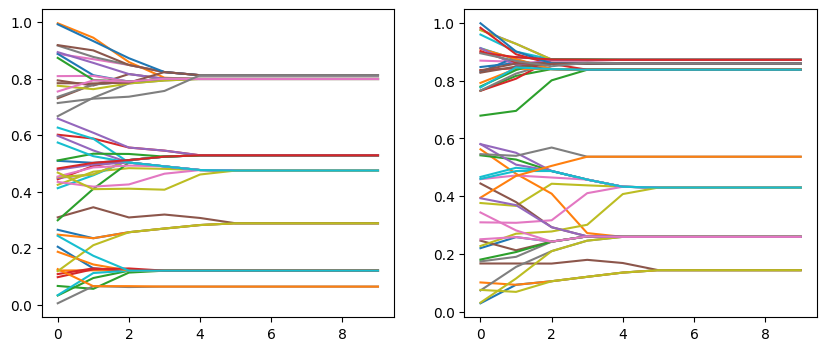

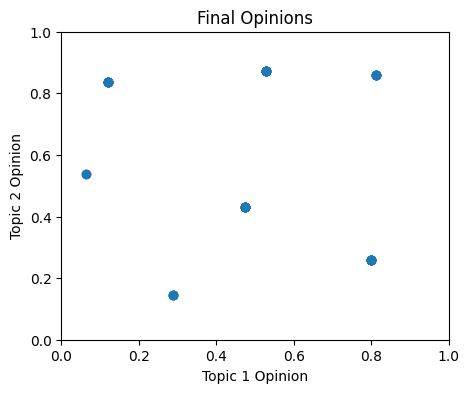

array([[[0.26482189, 0.24772529, 0.03216489, 0.44366417, 0.44842717,
         0.30887519, 0.88762545, 0.91721468, 0.42410821, 0.41220851,
         0.20486097, 0.99598579, 0.29848758, 0.60140902, 0.59774793,
         0.7938418 , 0.4343268 , 0.66698256, 0.45128739, 0.62663116,
         0.88772231, 0.12068908, 0.0659892 , 0.10799602, 0.47744288,
         0.73036836, 0.45334914, 0.73546525, 0.46736935, 0.0332463 ,
         0.50901816, 0.18693959, 0.51034559, 0.09707711, 0.65870332,
         0.9186665 , 0.80890438, 0.00468454, 0.77487751, 0.57375925,
         0.99232846, 0.12559709, 0.87349604, 0.48203598, 0.89381338,
         0.78385263, 0.75442289, 0.71364   , 0.11840158, 0.24352367],
        [0.02998325, 0.10206738, 0.76493691, 0.76471515, 0.97610845,
         0.16753572, 0.86898238, 0.76552544, 0.37668614, 0.95911784,
         0.84687323, 0.56241082, 0.54155626, 0.83639204, 0.58023329,
         0.44415136, 0.30987315, 0.0742897 , 0.97439515, 0.46672142,
         0.22053646, 0.79194029, 

In [5]:
## Setting parameters
num_agents = 50
T = 10
num_topics = 2
R = 0.2 # confidence bound
std = 0 # to remove random effects set standard deviation to 0

rng = np.random.default_rng()


## Setting up initial opinions
X = np.zeros((T, num_topics, num_agents))
X[0,:,:]  = np.random.rand(num_agents * num_topics).reshape((num_topics, num_agents))


## Running core model
for t in range(T-1):
    tmp = get_A_multidim(X[t,:,:], R)
    X[t+1,:,:] = tmp + rng.normal(0, std, size=tmp.shape)




# Plotting results

## Results over time
fig, ax = plt.subplots(1,num_topics,figsize=(10,4))
for i in range(num_agents):
    for j in range(num_topics):
        ax[j].plot(np.arange(T), X[:,j,:].T[i])
plt.show()

## Final results
fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.scatter(X[T-1,0,:], X[T-1,1,:])
ax.set(xlabel='Topic 1 Opinion', ylabel='Topic 2 Opinion', title='Final Opinions', xlim=(0,1), ylim=(0,1))
plt.show()

X

## Generating comparison plots

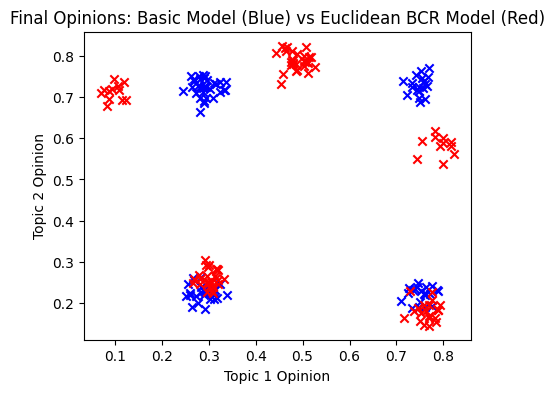

In [ ]:
## Setting parameters
num_agents = 100
T = 10
num_topics = 2
R = 0.2
std = 0.02

rng = np.random.default_rng()

## Setting up initial opinions
X = np.zeros((T, num_topics, num_agents))
X[0,:,:]  = np.random.rand(num_agents * num_topics).reshape((num_topics, num_agents))
X_euclid = np.copy(X)
X_basic = np.copy(X)

## Euclid model
for t in range(T-1):
    tmp = get_A_multidim(X_euclid[t,:,:], R)
    X_euclid[t+1,:,:] = tmp + rng.normal(0, std, size=tmp.shape)

## Basic model
tmp = np.zeros(X_basic[0,:,:].shape)
for t in range(Timesteps-1):
    for i in range(num_topics):
        tmp[i,:] = get_A(X_basic[t,i,:],R)
    X_basic[t+1,:,:] = tmp + rng.normal(0, std, size=tmp.shape)


# Plotting results

## Final results
fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.scatter(X_basic[-1,0,:], X_basic[T-1,1,:],marker='x',color='blue')
ax.scatter(X_euclid[-1,0,:], X_euclid[T-1,1,:], marker='x',color='red')
ax.set(xlabel='Topic 1 Opinion', ylabel='Topic 2 Opinion', title='Final Opinions: Basic Model (Blue) vs Euclidean BCR Model (Red)')
plt.show()



## Experiment: varying R

We are interested in seeing how many distinct clusters we get for varying values of R. We thus run the code repeatedly (x5) for various values of R to see how this number changes. We will not use any random noise.

In [170]:
## Paramters
num_agents = 10
T = 10
num_topics = 2

## List of R values to test
R_list = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1.0]
## Number of repeats per R value
num_repeats = 5

## Initialise cluster count storage arrays
basic_cluster_counts = np.zeros((len(R_list), num_repeats))
euclid_cluster_counts = np.zeros((len(R_list), num_repeats))

for i, R in enumerate(R_list):
    for repeat in range(num_repeats):
        ## Setting up initial opinions
        X_euclid = np.zeros((T, num_topics, num_agents))
        X_euclid[0,:,:]  = np.random.rand(num_agents * num_topics).reshape((num_topics, num_agents))
        X_basic = np.copy(X_basic)

        ## Euclid model
        for t in range(T-1):
            X_euclid[t+1,:,:] = get_A_multidim(X_euclid[t,:,:], R)
        

        ## Basic model
        for t in range(Timesteps-1):
            for j in range(num_topics):
                X_basic[t+1,j,:] = get_A(X_basic[t,j,:],R)
        

        ## Count number of clusters for each model
        euclid_cluster_counts[i,repeat] = np.unique(X_euclid[-1,:,:], axis=1, return_counts=False).shape[1]
        basic_cluster_counts[i,repeat] = np.unique(X_basic[-1,:,:], axis=1, return_counts=False).shape[1]


average_basic_clusters = np.mean(basic_cluster_counts, axis=1)
average_euclid_clusters = np.mean(euclid_cluster_counts, axis=1)

print(basic_cluster_counts)
print(euclid_cluster_counts)
print(average_basic_clusters)
print(average_euclid_clusters) 


[[100. 100. 100. 100. 100.]
 [100. 100. 100. 100. 100.]
 [ 16.  16.  16.  16.  16.]
 [  4.   4.   4.   4.   4.]
 [  1.   1.   1.   1.   1.]
 [  1.   1.   1.   1.   1.]
 [  1.   1.   1.   1.   1.]
 [  1.   1.   1.   1.   1.]
 [  1.   1.   1.   1.   1.]
 [  1.   1.   1.   1.   1.]]
[[10. 10. 10. 10. 10.]
 [10. 10. 10. 10. 10.]
 [ 8.  7.  9. 10. 10.]
 [ 7.  5.  6.  6.  4.]
 [ 3.  4.  2.  5.  2.]
 [ 2.  1.  2.  1.  2.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  2.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
[100. 100.  16.   4.   1.   1.   1.   1.   1.   1.]
[10.  10.   8.8  5.6  3.2  1.6  1.   1.2  1.   1. ]


In [162]:
test = np.array([[0.1, 0.2], [0.1, 0.2], [0.3, 0.4], [0.1, 0.2]])
unique, counts = np.unique(test, axis=0, return_counts=True)
print(unique)
print(counts)
print(test.shape)

unique, counts = np.unique(X_euclid[-1,:,:], axis=1, return_counts=True)
print(unique)
print(counts)
X_euclid[-1,:,:]
print(np.unique(X_euclid[-1,:,:], axis=1, return_counts=False))
np.unique(X_euclid[-1,:,:], axis=1, return_counts=False).shape[1]

[[0.1 0.2]
 [0.3 0.4]]
[3 1]
(4, 2)
[[0.09049231 0.18665582 0.70628769]
 [0.04052205 0.98914944 0.32323048]]
[1 1 8]
[[0.09049231 0.18665582 0.70628769]
 [0.04052205 0.98914944 0.32323048]]


3

## Correlation model

Idea: we treat the second opinions of people in our confidence interval as another person, albeit one whose opinion we care less about. We begin by letting both opinions affect the other.

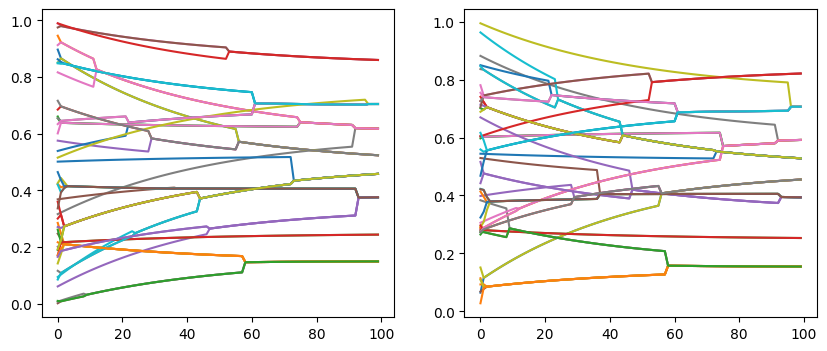

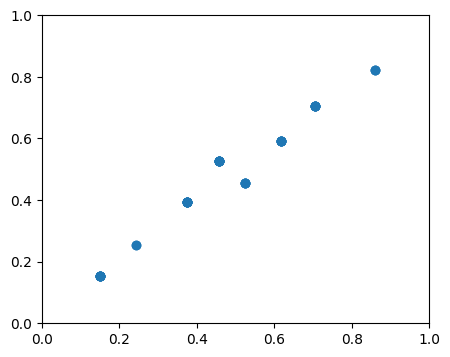

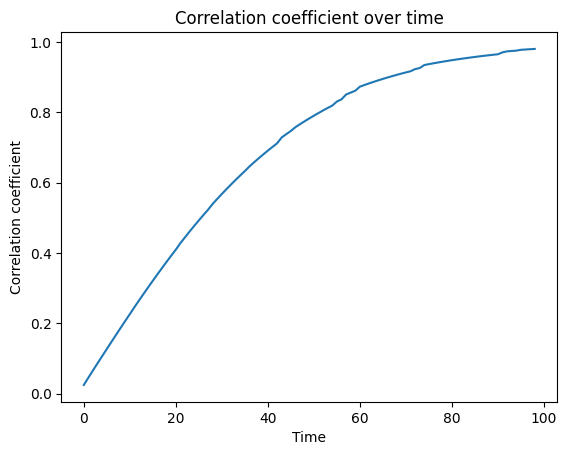

array([[[0.89690524, 0.28568423, 0.66093315, ..., 0.71646566,
         0.19353235, 0.84850727],
        [0.06430018, 0.09271107, 0.59727514, ..., 0.27302185,
         0.68915093, 0.61643713]],

       [[0.86617875, 0.24868747, 0.63871682, ..., 0.69664559,
         0.2233387 , 0.84694046],
        [0.11543761, 0.09305341, 0.60271697, ..., 0.28314011,
         0.69656375, 0.59027481]],

       [[0.85867134, 0.21078361, 0.63835682, ..., 0.69251053,
         0.27329869, 0.84742027],
        [0.12294502, 0.0850317 , 0.60307697, ..., 0.28727517,
         0.70522499, 0.55566586]],

       ...,

       [[0.52566687, 0.14994635, 0.61845948, ..., 0.52566687,
         0.45714437, 0.70498092],
        [0.45370869, 0.15453498, 0.59127928, ..., 0.45370869,
         0.52978671, 0.70639764]],

       [[0.52494728, 0.14999223, 0.61818768, ..., 0.52494728,
         0.45787079, 0.70499509],
        [0.45442827, 0.15448909, 0.59155109, ..., 0.45442827,
         0.52906029, 0.70638347]],

       [[0.524242

In [128]:
## Parameters
corr_w = 0.01 ## Correlation weighting between topic 1 and topic 2. Should be between 0 and 0.5.
num_agents = 50
T = 100
num_topics = 2 ## keep fixed at 2 (our model doesn't work for more)
R = 0.1 # confidence bound
std = 0 # to remove random effects set standard deviation to 0. If you want noise, we find 0.03 works best.


## Setting up initial opinions
X_corr = np.zeros((T, num_topics, num_agents))
X_corr[0,:,:]  = np.random.rand(num_agents * num_topics).reshape((num_topics, num_agents))
rvals = np.zeros(T-1)

for t in range(T-1):
    tmp = get_A_multidim(X_corr[t,:,:], R)
    X_corr[t+1,:,:] = (1-abs(corr_w))*tmp + rng.normal(0, std, size=tmp.shape) + corr_w*tmp[::-1,:]
    rvals[t] = stats.linregress(X_corr[t+1,0,:], X_corr[t+1,1,:]).rvalue

# Note: X[:,0,:].T[0] evolution of 1 agent in opinion on topic 0


# Plotting results

## Results over time
fig, ax = plt.subplots(1,num_topics,figsize=(10,4))
for i in range(num_agents):
    for j in range(num_topics):
        ax[j].plot(np.arange(T), X_corr[:,j,:].T[i])
plt.show()

## Plotting final results
fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.scatter(X_corr[T-1,0,:], X_corr[T-1,1,:])
ax.set(xlim=(0,1), ylim=(0,1))
plt.show()

plt.plot(np.arange(T-1), rvals)
plt.title('Correlation coefficient over time')
plt.xlabel('Time')
plt.ylabel('Correlation coefficient')
plt.show()

X_corr

## One topic + Political Shocks

In [129]:
num_agents = 50
T = 10
num_topics = 1
R = 0.3 # confidence bound

In [130]:
X  = np.random.rand(num_agents * T * num_topics).reshape((T, num_topics, num_agents))
avg_opinion = np.zeros((num_topics,T))
t_shock = np.randint(T)

AttributeError: module 'numpy' has no attribute 'randint'

In [ ]:
for t in range(T-1):
    if(t = t_shock):
        
        
    X[t+1,0,:] = get_A(X[t,0,:],R)

In [ ]:
opinions_1.sort()

# Initialising matrix of opinions over time
opinions_over_time = np.zeros((Timesteps, num_of_agents))
opinions_over_time[0,:] = opinions_1
for t in range(Timesteps-1):
    opinions_over_time[t+1,:] = get_A(opinions_over_time[t,:],R)

opinions_over_time

extremes_high = (opinions_over_time > 0.8)
extremes_low = (opinions_over_time < 0.2)
# extremes = opinions_over_time[mask]

NameError: name 'opinions_1' is not defined

In [ ]:
opinions_2.sort()

# Initialising matrix of opinions over time
opinions_over_time_2 = np.zeros((Timesteps, num_of_agents))
opinions_over_time_2[0,:] = opinions_2
for t in range(Timesteps-1):
    opinions_over_time_2[t+1,:] = get_A(opinions_over_time_2[t,:],R)
opinions_over_time_2